In [13]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.chebyshev import chebfit, chebval
import scipy.integrate as spi

# 1 task

Значения в узлах: [-2.92444446e-02 -1.87500000e-01 -2.42461578e-01 -1.03293978e-01
 -3.74939946e-33 -1.03293978e-01 -2.42461578e-01 -1.87500000e-01
 -2.92444446e-02]


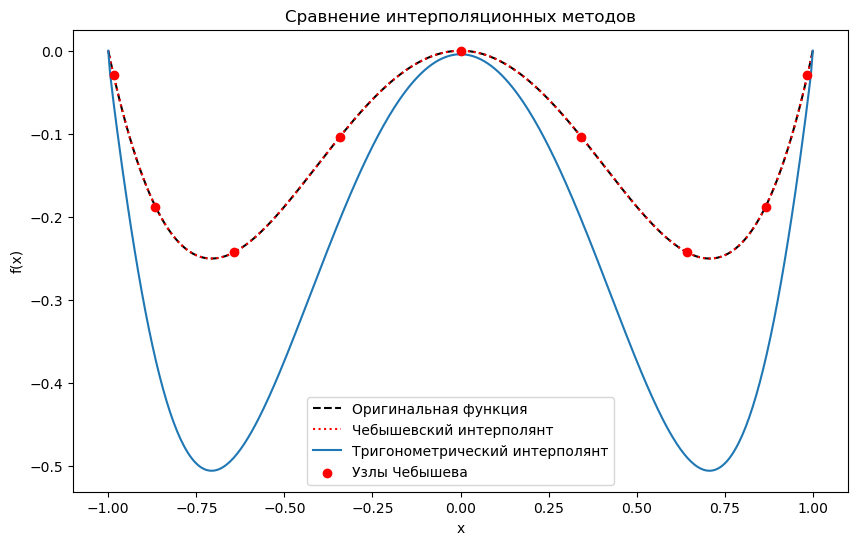

Ошибка Чебышевского интерполянта на границах: [1.11022302e-16 1.66533454e-16]
Ошибка тригонометрического интерполянта на границах: [1.20058851e-16 1.24900090e-16]


In [9]:
# 5 вариант
m = 9
def f(x):
    return x**4 - x**2

k = np.arange(m)
x_chebyshev = np.cos(np.pi * (2*k + 1) / (2*m))
f_values = f(x_chebyshev)
print("Значения в узлах:", f_values)

cheb_coeffs = chebfit(x_chebyshev, f_values, m-1)

def chebyshev_interp(x):
    return chebval(x, cheb_coeffs)

t = np.arccos(x_chebyshev)

a_j = np.array([2/m * np.sum(f_values * np.cos(j * t)) for j in range(m)])
b_j = np.array([2/m * np.sum(f_values * np.sin(j * t)) for j in range(1, m)])

def trig_interp(x):
    t_x = np.arccos(x)
    trig_sum = a_j[0] / 2 + np.sum(a_j[1:] * np.cos(np.arange(1, m) * t_x))
    trig_sum += np.sum(b_j * np.sin(np.arange(1, m) * t_x))
    return trig_sum

x_vals = np.linspace(-1, 1, 400)
f_exact = f(x_vals)
cheb_vals = chebyshev_interp(x_vals)
trig_vals = [trig_interp(x) for x in x_vals]

plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_exact, label='Оригинальная функция', linestyle='dashed', color='black')
plt.plot(x_vals, cheb_vals, linestyle='dotted', label='Чебышевский интерполянт', color = 'red')
plt.plot(x_vals, trig_vals, label='Тригонометрический интерполянт')
plt.scatter(x_chebyshev, f_values, color='red', zorder=3, label='Узлы Чебышева')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Сравнение интерполяционных методов')
plt.show()

x_edges = np.array([-1, 1])
error_cheb = np.abs(f(x_edges) - chebyshev_interp(x_edges))
error_trig = np.abs(f(x_edges) - np.array([trig_interp(x) for x in x_edges]))

print("Ошибка Чебышевского интерполянта на границах:", error_cheb)
print("Ошибка тригонометрического интерполянта на границах:", error_trig)

# task 2

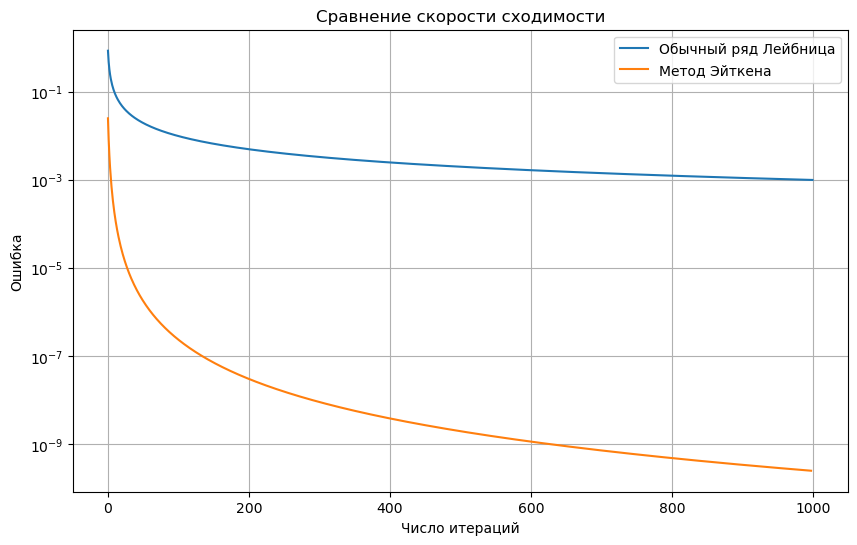

Приближённое значение π: 3.1415926535898


In [11]:
def leibniz_sum(N):
    terms = np.array([(-1)**n / (2*n + 1) for n in range(N)])
    return np.cumsum(terms) * 4

def tail_sum(N):
    return 4 * (np.arctan(1) - np.sum([(-1)**n / (2*n + 1) for n in range(N)]))

def aitken_acceleration(seq):
    accelerated = np.zeros(len(seq)-2)
    for n in range(len(seq)-2):
        num = (seq[n+1] - seq[n])**2
        den = seq[n+2] - 2*seq[n+1] + seq[n]
        if den != 0:
            accelerated[n] = seq[n] - num / den
        else:
            accelerated[n] = seq[n]
    return accelerated

N = 1000 
pi_approximations = leibniz_sum(N)
tail_correction = tail_sum(N)
accurate_pi = pi_approximations + tail_correction

aitken_pi = aitken_acceleration(pi_approximations)

plt.figure(figsize=(10, 6))
plt.plot(range(N), np.abs(pi_approximations - np.pi), label='Обычный ряд Лейбница')
plt.plot(range(N-2), np.abs(aitken_pi - np.pi)[:N-2], label='Метод Эйткена')
plt.yscale('log')
plt.xlabel('Число итераций')
plt.ylabel('Ошибка')
plt.title('Сравнение скорости сходимости')
plt.legend()
plt.grid()
plt.show()

print(f"Приближённое значение π: {accurate_pi[-1]:.13f}")


# task 3

/var/folders/pp/mwb40zv519zbg002_qh26rb40000gn/T/ipykernel_44668/722594378.py:5: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp((x - 10) * beta))


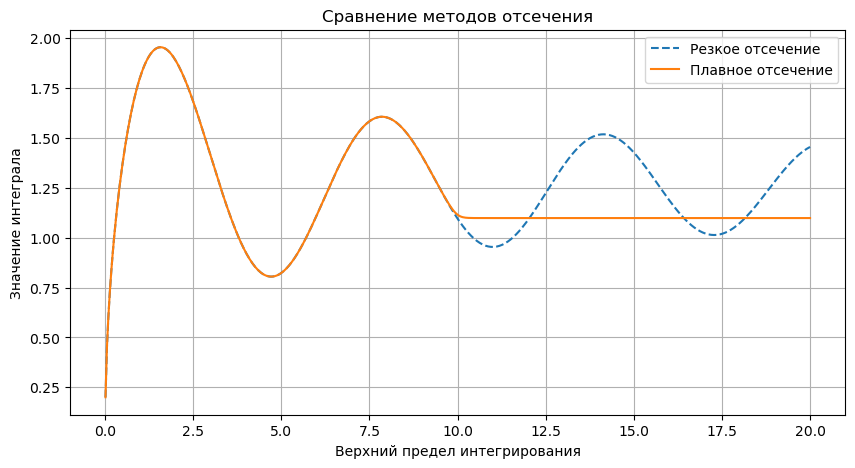

Интеграл с резким отсечением: I = 1.095306, ошибка: 5.37e-11
Интеграл с плавным отсечением: I = 1.098315, ошибка: 8.01e-09


In [15]:
def integrand(x):
    return np.cos(x) / np.sqrt(x)

def smooth_cutoff(x, beta=10):
    return 1 / (1 + np.exp((x - 10) * beta))

def integrand_smooth(x):
    return integrand(x) * smooth_cutoff(x)

N = 10  
I_sharp, err_sharp = spi.quad(integrand, 0, N)

I_smooth, err_smooth = spi.quad(integrand_smooth, 0, np.inf)

x_vals = np.linspace(0.001, 20, 500)
smooth_vals = smooth_cutoff(x_vals)
integrand_vals = integrand(x_vals)

def cumulative_integral(func, x_vals):
    return [spi.quad(func, 0, x)[0] for x in x_vals]

I_sharp_vals = cumulative_integral(integrand, x_vals)
I_smooth_vals = cumulative_integral(integrand_smooth, x_vals)

plt.figure(figsize=(10, 5))
plt.plot(x_vals, I_sharp_vals, label='Резкое отсечение', linestyle='dashed')
plt.plot(x_vals, I_smooth_vals, label='Плавное отсечение', linestyle='solid')
plt.xlabel('Верхний предел интегрирования')
plt.ylabel('Значение интеграла')
plt.legend()
plt.title('Сравнение методов отсечения')
plt.grid()
plt.show()

print(f'Интеграл с резким отсечением: I = {I_sharp:.6f}, ошибка: {err_sharp:.2e}')
print(f'Интеграл с плавным отсечением: I = {I_smooth:.6f}, ошибка: {err_smooth:.2e}')


# task 4

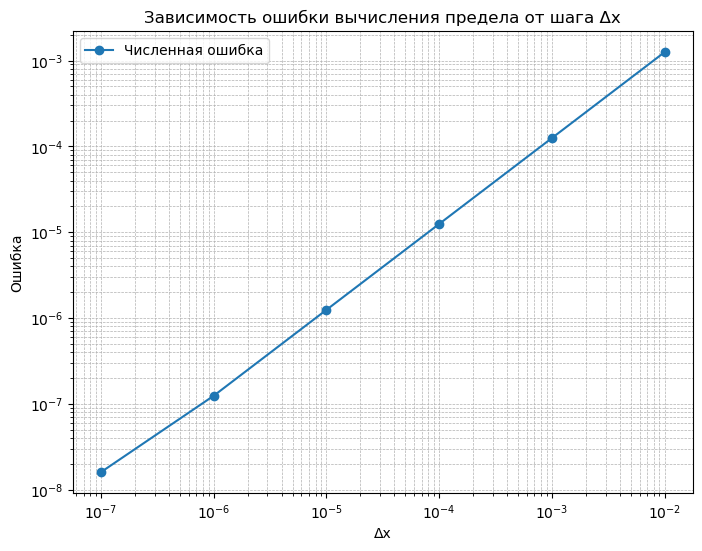

Δx        L (числ.)           Ошибка
(0.01, 1.001252085940063, 0.0012520859400630968)
(0.001, 1.00012502083624, 0.00012502083623999738)
(0.0001, 1.0000125002029847, 1.2500202984710995e-05)
(1e-05, 1.0000012499844502, 1.249984450168995e-06)
(1e-06, 1.000000124928846, 1.2492884593484632e-07)
(1e-07, 1.0000000161269895, 1.612698952158098e-08)


In [20]:
def y(x):
    return np.where(x > 0, np.exp(x) + 3, 4 + x)

def compute_limit(delta_x):
    y1 = y(delta_x / 2)
    y0 = y(-delta_x / 2)
    return (y1 - y0) / delta_x

delta_x_values = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7]
computed_limits = [compute_limit(dx) for dx in delta_x_values]

# теоретичесий результат
L_exact = 1

errors = np.abs(np.array(computed_limits) - L_exact)

plt.figure(figsize=(8, 6))
plt.loglog(delta_x_values, errors, marker='o', linestyle='-', label='Численная ошибка')
plt.xlabel("Δx")
plt.ylabel("Ошибка")
plt.title("Зависимость ошибки вычисления предела от шага Δx")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


print(f"{'Δx':<10}{'L (числ.)':<20}{'Ошибка'}")
for i in list(zip(delta_x_values, computed_limits, errors)):
    print(i)
